## Assignment

Import necessary library

In [36]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Read the data

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [4]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [6]:
df_can['Total'] = df_can.sum(axis=1)

In [31]:
df_can.columns = list(map(str, df_can.columns))
year = list(map(str, range(1980, 2014)))

In [24]:
df_can.set_index('Country', inplace=True)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [32]:
### type your answer here
df_res = df_can.loc[['India', 'China'],year]
df_res.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [34]:
df_res = df_res.transpose()

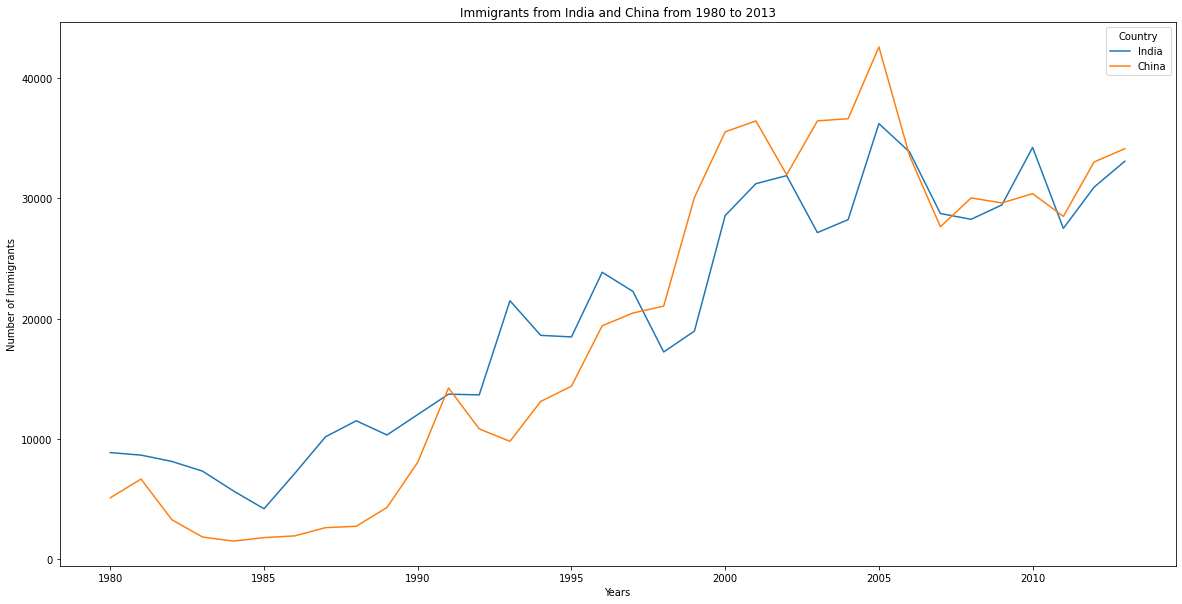

In [37]:
### type your answer here
df_res.index = df_res.index.map(int)
df_res.plot(kind='line', figsize=(20, 10))

plt.title('Immigrants from India and China from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [40]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

In [42]:
### type your answer here
df_lima = df_can.head(5)
df_lima = df_lima[year].transpose() 


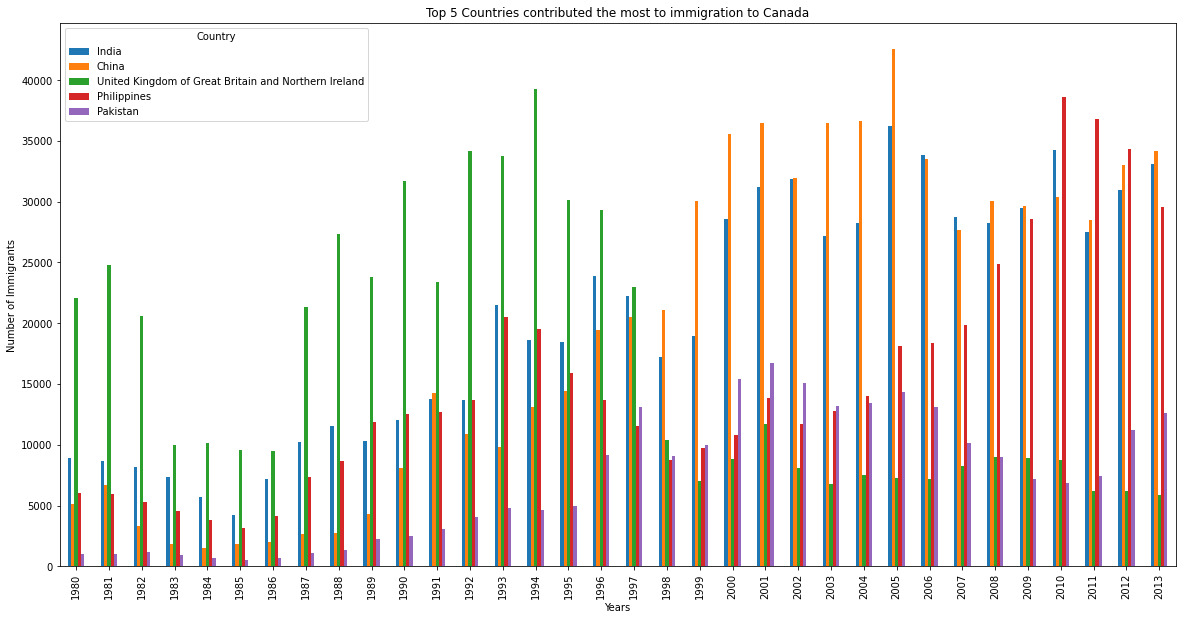

In [43]:
### type your answer here
df_lima.index = df_lima.index.map(int) 
df_lima.plot(kind='bar', figsize=(20, 10))
 
plt.title('Top 5 Countries contributed the most to immigration to Canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

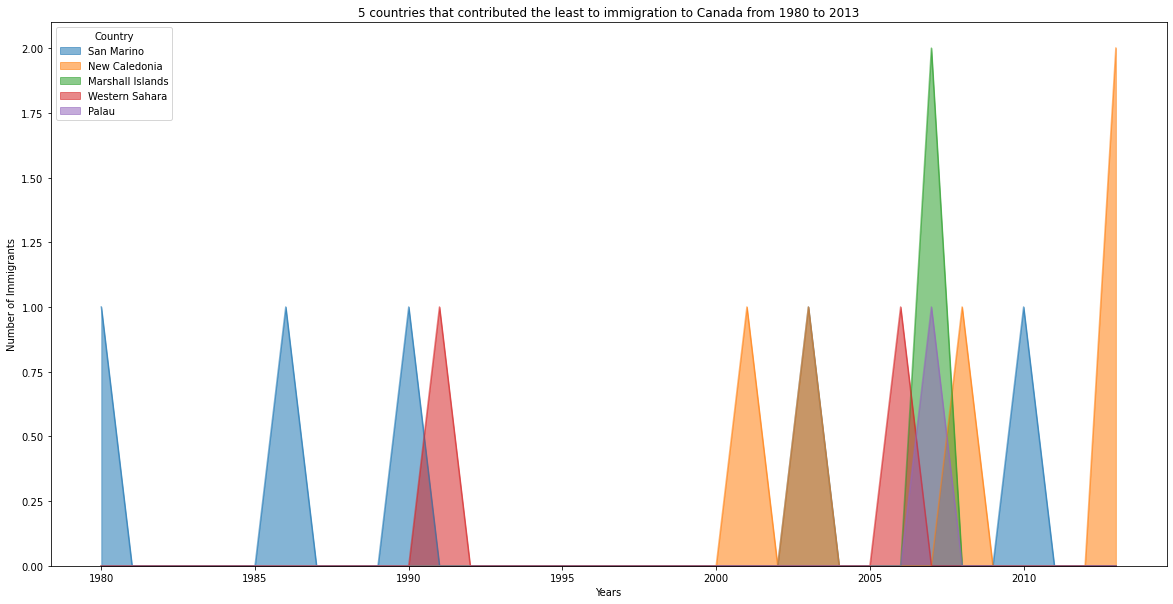

In [45]:
### type your answer here
df_least = df_can.tail(5)
df_least = df_least[year].transpose() 
df_least.index = df_least.index.map(int)
df_least.plot(kind='area',stacked=False, alpha=0.55, figsize=(20, 10))
 
plt.title('5 countries that contributed the least to immigration to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

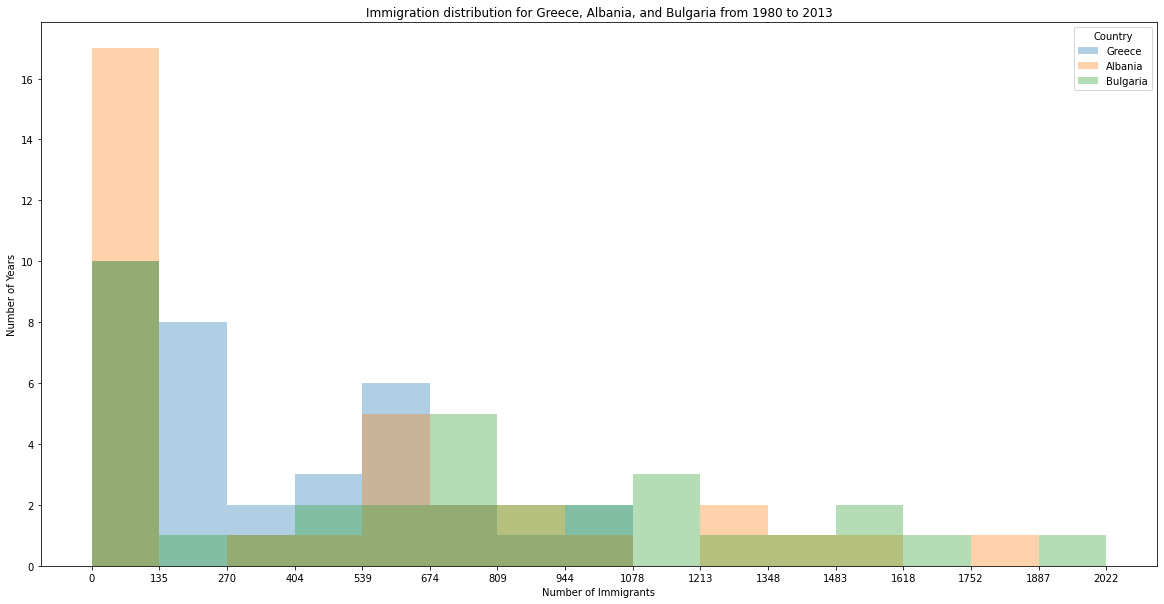

In [47]:
### type your answer here
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria'], year]
df_gab = df_gab.transpose() 
count, bin_edges = np.histogram(df_gab, 15)
df_gab.plot(kind ='hist', figsize=(20, 10), bins=15, alpha=0.35, xticks=bin_edges)

plt.title('Immigration distribution for Greece, Albania, and Bulgaria from 1980 to 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [48]:
### type your answer here
df_result = df_can['Total'].head(15)
df_result.sort_values(ascending=True, inplace=True)
df_result


Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

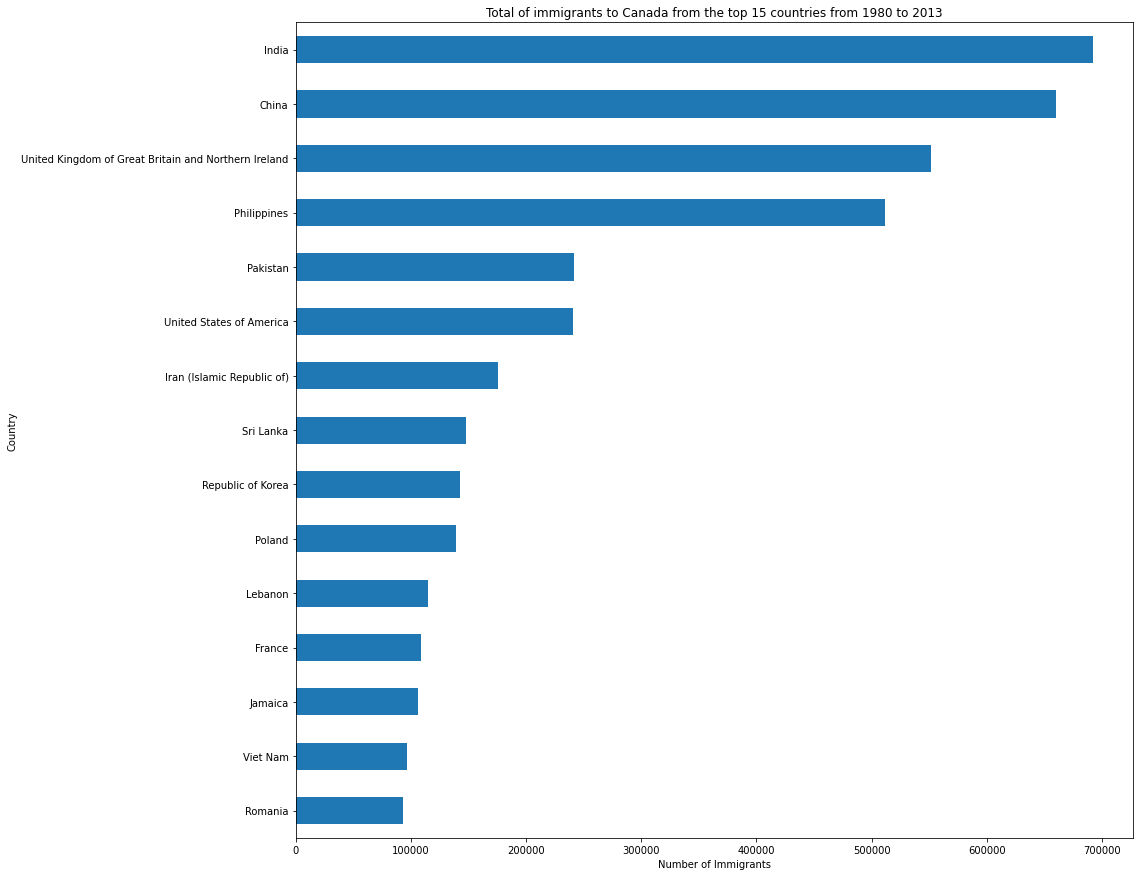

In [49]:
### type your answer here
df_result.plot(kind='barh', figsize=(15, 15))
plt.xlabel('Number of Immigrants')
plt.title('Total of immigrants to Canada from the top 15 countries from 1980 to 2013')
plt.show()


# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).